# Introduction to datetime

In solar photovoltaic problems, it is very common to have data whose index involves dates and times. 
For this using the *DateTimeIndex* is very useful. 

:::{note}
If you have not yet set up Python on your computer, you can execute this tutorial in your browser via [Google Colab](https://colab.research.google.com/). Click on the rocket in the top right corner and launch "Colab". If that doesn't work download the `.ipynb` file and import it in [Google Colab](https://colab.research.google.com/).

Then install `pandas` and `numpy` by executing the following command in a Jupyter cell at the top of the notebook.

```sh
!pip install pandas numpy
```
:::

In [37]:
import pandas as pd
import numpy as np

We can create a time index by indicating the start, frequency and the number of periods. 

In [38]:
time = pd.date_range(start="2024-01-01", 
                           periods=365, 
                           freq='D')

We can also use the start, frequency and end. 

In [39]:
time = pd.date_range(start="2024-01-01", 
                     end="2026-01-01", 
                     freq="D")

We can use the time index to create a series and plot it. 

<AxesSubplot:>

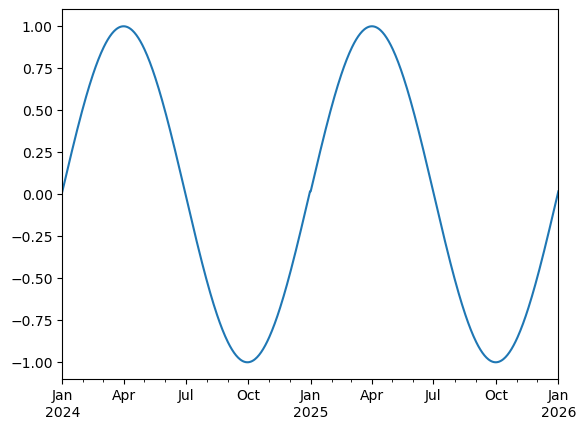

In [40]:
values = np.sin(2 * np.pi * time.dayofyear / 365)
ts = pd.Series(values, index=time)
ts.plot()

We can use Python's _slicing_ notation inside `.loc` to select a date range.

<AxesSubplot:>

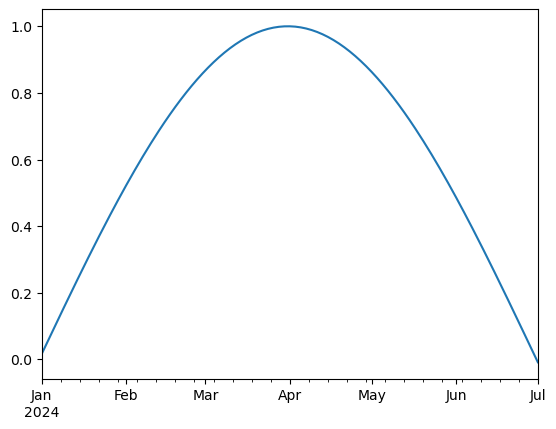

In [41]:
ts.loc["2024-01-01":"2024-07-01"].plot()

<AxesSubplot:>

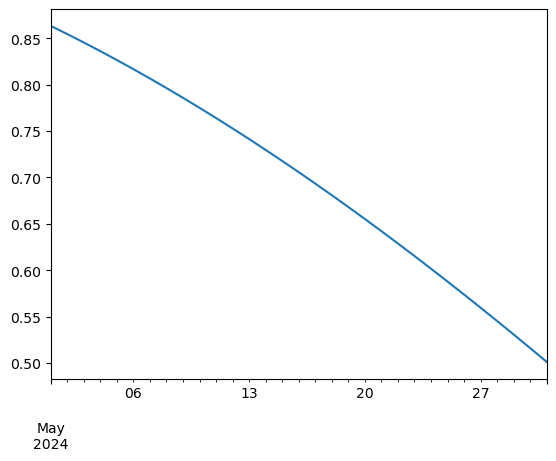

In [42]:
ts.loc["2024-05"].plot()

The `pd.TimeIndex` object has lots of useful attributes

In [43]:
ts.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
           dtype='int64', length=732)

In [44]:
ts.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            23, 24, 25, 26, 27, 28, 29, 30, 31,  1],
           dtype='int64', length=732)

Another common operation is to change the resolution of a dataset by resampling in time. Pandas exposes this through the [resample](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling) function. The resample periods are specified using pandas [offset index](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) syntax.

Below we resample the dataset by taking the mean over each month.

In [45]:
ts.resample("M").mean().head()

2024-01-31    0.268746
2024-02-29    0.704299
2024-03-31    0.954333
2024-04-30    0.955056
2024-05-31    0.697250
Freq: M, dtype: float64

<AxesSubplot:>

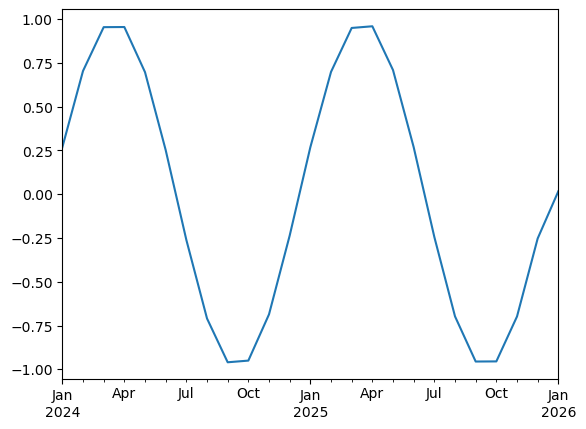

In [46]:
ts.resample("M").mean().plot()

We can now import the same file from previous introduction containing data measured at a weather station, and make its index a *DateTimeIndex*

In [47]:
fn = "weather_station_data.csv"
df = pd.read_csv(fn, index_col=0)
df.index = pd.to_datetime(df.index, utc=True) 
df.index

DatetimeIndex(['2024-01-01 00:00:00+00:00', '2024-01-01 00:05:00+00:00',
               '2024-01-01 00:10:00+00:00', '2024-01-01 00:15:00+00:00',
               '2024-01-01 00:20:00+00:00', '2024-01-01 00:25:00+00:00',
               '2024-01-01 00:30:00+00:00', '2024-01-01 00:35:00+00:00',
               '2024-01-01 00:40:00+00:00', '2024-01-01 00:45:00+00:00',
               ...
               '2024-07-01 23:10:00+00:00', '2024-07-01 23:15:00+00:00',
               '2024-07-01 23:20:00+00:00', '2024-07-01 23:25:00+00:00',
               '2024-07-01 23:30:00+00:00', '2024-07-01 23:35:00+00:00',
               '2024-07-01 23:40:00+00:00', '2024-07-01 23:45:00+00:00',
               '2024-07-01 23:50:00+00:00', '2024-07-01 23:55:00+00:00'],
              dtype='datetime64[ns, UTC]', length=52704, freq=None)

We can define a time series and use it to select data within the database. 

<AxesSubplot:>

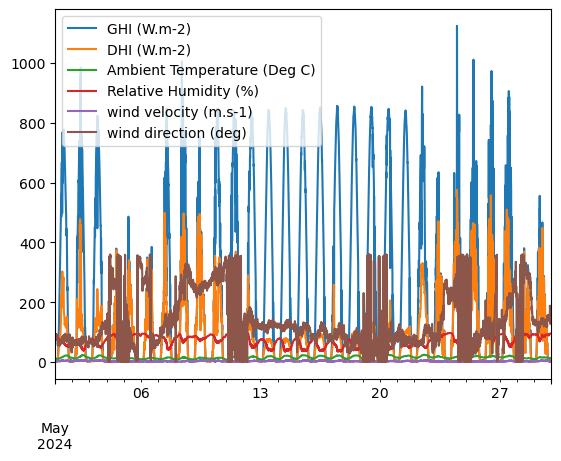

In [48]:
start_date = '2024-05-01 00:00:00'
end_date =  '2024-05-30 00:00:00'
time_index= pd.date_range(start=start_date, 
                                  end=end_date, 
                                  freq='5min',
                                     tz='UTC')
df.loc[time_index].plot()


We can also group the values per day, average them and plot them. 

<AxesSubplot:>

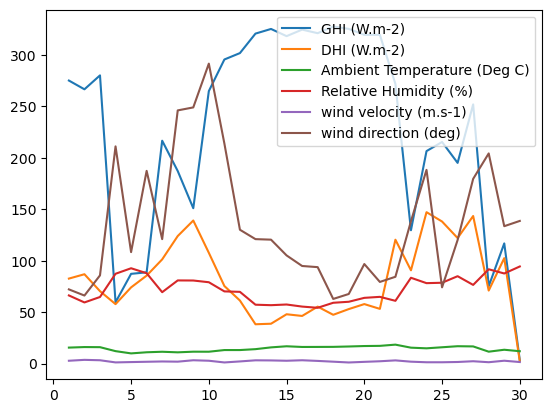

In [36]:
df.loc[time_index].groupby(df.loc[time_index].index.day).mean().plot()